In [ ]:
!pip install matplotlib
!pip install pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [2]:
# Replace 'your_file.txt' with the path to your text file
txt_file = 'optuna_trials.txt'

arr_bops = []
arr_dist = []

with open(txt_file, "r") as f:
    lines = f.readlines()
    for line in lines:
        arr_line = line.split(' ')
        arr_bops.append(float(arr_line[6].replace(",", "")))
        arr_dist.append(float(arr_line[4].replace(",", "")))
        
x = arr_bops
y = arr_dist

/var/folders/hr/3m0ycv617j9_wxp2l5s38rn40000gn/T/ipykernel_52680/3759150984.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('viridis_r')


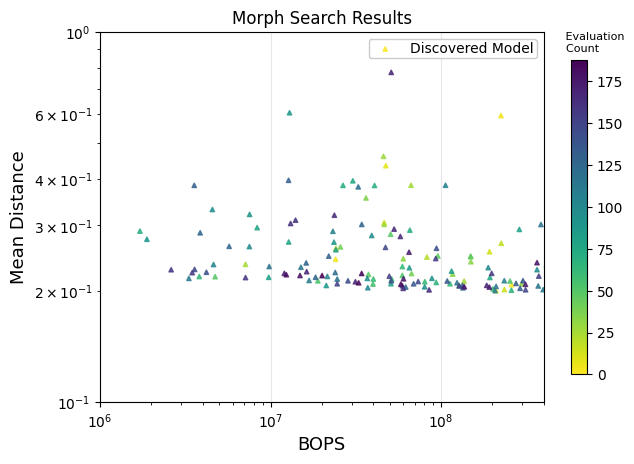

In [3]:
fig, ax = plt.subplots(figsize=(7,5))

# Select colormap and define count
cm = plt.cm.get_cmap('viridis_r')
count = [x for x in range(len(x))]

ax.scatter(x, y, marker='^', alpha=0.8, c=count, 
        cmap=cm, label='Discovered Model', s=10)
ax.set_title('Morph Search Results')
ax.set_xlabel('BOPS', fontsize=13)
ax.set_ylabel('Mean Distance', fontsize=13)
ax.legend(fancybox=True, fontsize=10, framealpha=1, borderpad=0.2, loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(1e6, 0.4e9)
ax.set_ylim(0.1, 1)
ax.set_yscale('log')
ax.set_xscale('log')

# Eval Count bar
norm = plt.Normalize(0, len(x))
sm = ScalarMappable(norm=norm, cmap=cm)
cbar = fig.colorbar(sm, ax=ax, shrink=0.85)
cbar.ax.set_title("         Evaluation\n  Count", fontsize=8)

fig.tight_layout(pad=2)
plt.show; 
#plt.savefig('output.png')